In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv('../datasets/EU_energy_data.csv')

df = df.rename(columns = {'fecha' : 'Date','hora' : 'Hour' , 'sistema' : 'EU_countries','bandera' : 'non-green_conventional_electricity',
                         'precio' : 'Cost(€/MWh)','tipo_moneda' : 'CurrencyType','origen_dato' : 'DataSource', 'fecha_actualizacion' : 'Updated_Date'})

# HU: Hungary
# DK1: Denmark (Western)
# DK2: Denmark (Eastern)
# EE: Estonia
# ELE: Possibly a specific region or market within a country
# FI: Finland
# GB: Great Britain
# LT: Lithuania
# NO1, NO2, NO3, NO4, NO5: Different regions in Norway
# SE1, SE2, SE3, SE4: Different regions in Sweden
# SYS: System-wide or aggregated data
# LV: Latvia
# ES: Spain
# FR: France
# PT: Portugal
# FRE: Possibly a specific region or market within France
# RS: Serbia
# AT: Austria
# BE: Belgium
# DE: Germany
# NL: Netherlands
# IT: Italy
# CALA, CNOR, CSUD, NORD, SARD, SICI, SUD: Different regions in Italy

In [60]:
print(df.head())
print(df.describe())

   Unnamed: 0        Date  Hour EU_countries  \
0           0  2010-07-21     1           HU   
1           1  2010-07-21     2           HU   
2           2  2010-07-21     3           HU   
3           3  2010-07-21     4           HU   
4           4  2010-07-21     5           HU   

   non-green_conventional_electricity  Cost(€/MWh)  CurrencyType  DataSource  \
0                                   1       39.287             1           6   
1                                   1       35.925             1           6   
2                                   1       33.223             1           6   
3                                   1       30.842             1           6   
4                                   1       33.395             1           6   

          Updated_Date  
0  2021-10-01 12:39:53  
1  2021-10-01 12:39:53  
2  2021-10-01 12:39:53  
3  2021-10-01 12:39:53  
4  2021-10-01 12:39:53  
         Unnamed: 0          Hour  non-green_conventional_electricity  \
count  

In [61]:
# Display summary statistics for relevant columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1831555 entries, 0 to 1831554
Data columns (total 9 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   Unnamed: 0                          int64  
 1   Date                                object 
 2   Hour                                int64  
 3   EU_countries                        object 
 4   non-green_conventional_electricity  int64  
 5   Cost(€/MWh)                         float64
 6   CurrencyType                        int64  
 7   DataSource                          int64  
 8   Updated_Date                        object 
dtypes: float64(1), int64(5), object(3)
memory usage: 125.8+ MB


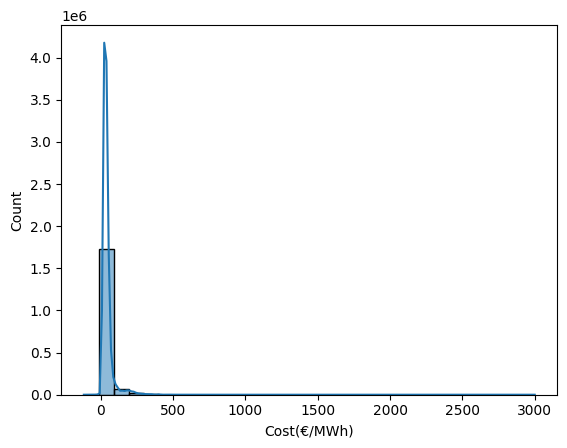

In [62]:
sns.histplot(df['Cost(€/MWh)'], bins=30, kde=True)
plt.show()

In [63]:
print('There are {} missing values or NaNs in df_energy.'
      .format(df.isnull().values.sum()))

temp_df = df.duplicated(keep='first').sum()

print('There are {} duplicate rows in df_energy based on all columns.'
      .format(df))

There are 0 missing values or NaNs in df_energy.
There are          Unnamed: 0        Date  Hour EU_countries  \
0                 0  2010-07-21     1           HU   
1                 1  2010-07-21     2           HU   
2                 2  2010-07-21     3           HU   
3                 3  2010-07-21     4           HU   
4                 4  2010-07-21     5           HU   
...             ...         ...   ...          ...   
1831550     1831550  2022-01-08    24          SE3   
1831551     1831551  2022-01-08    24          SE4   
1831552     1831552  2022-01-08    24         SICI   
1831553     1831553  2022-01-08    24          SUD   
1831554     1831554  2022-01-08    24          SYS   

         non-green_conventional_electricity  Cost(€/MWh)  CurrencyType  \
0                                         1       39.287             1   
1                                         1       35.925             1   
2                                         1       33.223             1

In [32]:
# Convert categorical columns
df['EU_countries'] = df['EU_countries'].astype('category')
df['CurrencyType'] = df['CurrencyType'].astype('category')
df['DataSource'] = df['DataSource'].astype('category')

# Convert date columns to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Updated_Date'] = pd.to_datetime(df['Updated_Date'])

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1831555 entries, 0 to 1831554
Data columns (total 9 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   Unnamed: 0                          int64  
 1   Date                                object 
 2   Hour                                int64  
 3   EU_countries                        object 
 4   non-green_conventional_electricity  int64  
 5   Cost(€/MWh)                         float64
 6   CurrencyType                        int64  
 7   DataSource                          int64  
 8   Updated_Date                        object 
dtypes: float64(1), int64(5), object(3)
memory usage: 125.8+ MB


,Unnamed: 0,Date,Hour,EU_countries,non-green_conventional_electricity,Cost(€/MWh),CurrencyType,DataSource,Updated_Date
633,633,2010-08-16,10,HU,1,2999.07,1,6,2021-10-01 12:39:53
634,634,2010-08-16,11,HU,1,2999.14,1,6,2021-10-01 12:39:53
635,635,2010-08-16,12,HU,1,2999.26,1,6,2021-10-01 12:39:53
636,636,2010-08-16,13,HU,1,2999.25,1,6,2021-10-01 12:39:53
637,637,2010-08-16,14,HU,1,2999.21,1,6,2021-10-01 12:39:53
638,638,2010-08-16,15,HU,1,2999.16,1,6,2021-10-01 12:39:53
639,639,2010-08-16,16,HU,1,2999.16,1,6,2021-10-01 12:39:53
640,640,2010-08-16,17,HU,1,2999.07,1,6,2021-10-01 12:39:53
641,641,2010-08-16,18,HU,1,2999.02,1,6,2021-10-01 12:39:53
89413,89413,2013-06-07,8,DK1,1,1901.32,1,2,2021-10-01 12:39:53


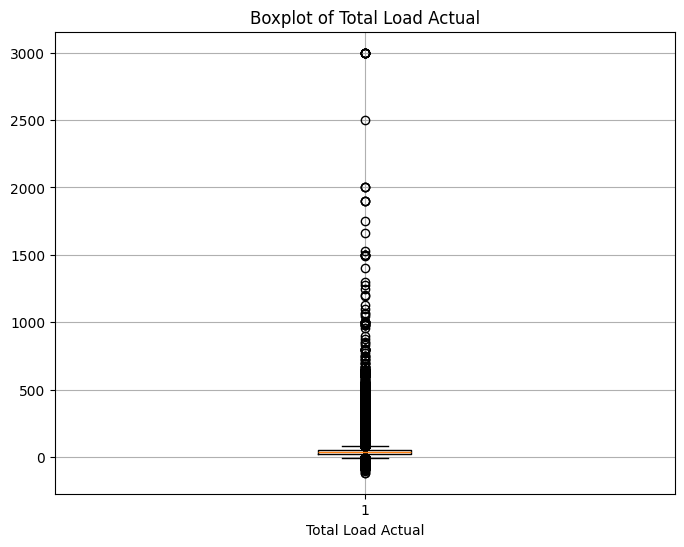

In [68]:
# Create the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Cost(€/MWh)'])
plt.title("Boxplot of Total Load Actual")
plt.xlabel("Total Load Actual")
plt.grid(True)
plt.show()

In [70]:
# Filter rows where 'Cost(€/MWh)' is greater than 1000
df.loc[df['Cost(€/MWh)'] > 500]

,Unnamed: 0,Date,Hour,EU_countries,non-green_conventional_electricity,Cost(€/MWh),CurrencyType,DataSource,Updated_Date
633,633,2010-08-16,10,HU,1,2999.070,1,6,2021-10-01 12:39:53
634,634,2010-08-16,11,HU,1,2999.140,1,6,2021-10-01 12:39:53
635,635,2010-08-16,12,HU,1,2999.260,1,6,2021-10-01 12:39:53
636,636,2010-08-16,13,HU,1,2999.250,1,6,2021-10-01 12:39:53
637,637,2010-08-16,14,HU,1,2999.210,1,6,2021-10-01 12:39:53
...,...,...,...,...,...,...,...,...,...
1817510,1817510,2021-12-22,19,SICI,0,510.001,1,8,2021-12-21 13:20:20
1817511,1817511,2021-12-22,19,SUD,0,510.001,1,8,2021-12-21 13:20:20
1817538,1817538,2021-12-22,20,RS,0,522.810,1,5,2021-12-21 10:46:11
1818262,1818262,2021-12-23,18,BE,0,510.510,1,2,2021-12-22 13:26:15


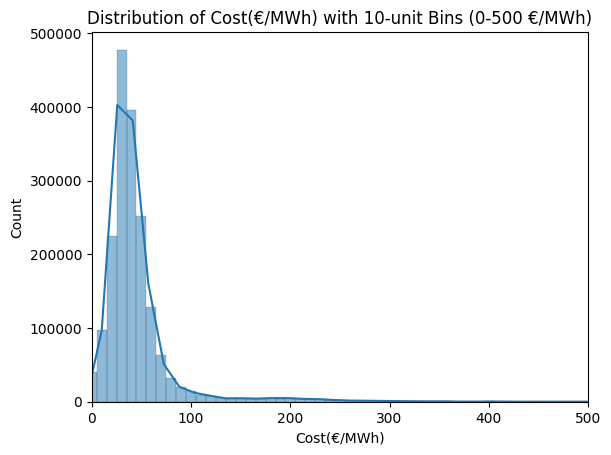

In [72]:
# Plot histogram with bin width of 10 and x-axis limited to 0-500 €/MWh
sns.histplot(df['Cost(€/MWh)'], binwidth=10, kde=True)
plt.title('Distribution of Cost(€/MWh) with 10-unit Bins (0-500 €/MWh)')
plt.xlabel('Cost(€/MWh)')
plt.ylabel('Count')
plt.xlim(0, 500)  # Set x-axis limit to 0-500
plt.show()